# Relatividade xeral con gravipy

Primeiro imos definir os paquetes necesarios:

In [3]:
from gravipy import *   #Importamos a librería Gravipy, para calculos de relatividade xeral
init_printing(use_unicode = True)   #Para que os resultados aparezcan bonicos

Podemos comezar inicializando as nosas variables como símbolos, creando o cuadrivector $x$, e definindo a matriz da métrica $M$, a cal contén os coeficientes da nosa métrica $g$, a cal definimos na última línea.

In [164]:
t, r, theta, phi, M = symbols('t, r, \\theta, \phi, M') # define some symbolic variables
B = Function('B')(r)  #  Estas dúas liñas de código definen as funcións B(r) e A(r) para poder traballar cunha
A = Function('A')(r)  # métrica xenérica diagonal. Non son necesarias para a de Minkowski ou Schwarzschild.
x = Coordinates('\chi', [t, r, theta, phi]) # Crea o cuadrivector das coordenadas

# A continuación hai varias métricas (matrices de coeficientes) definidas, 
# para probar a obter os resultados obtidos nas clases de problemas

#Metric = diag(-1, 1, 1, 1)  #Métrica de Minkowski (espazo plano)
Metric = Matrix([[-B, 0, 0, 0], [0, A, 0, 0], [0, 0, r**2, 0], [0, 0, 0, r**2*sin(theta)**2]]) #Métrica xenérica diagonal
#Metric = diag(-(1-2*M/r), 1/(1-2*M/r), r**2, r**2*sin(theta)**2) # Métrica de Schwarzschild


g = MetricTensor('g', x, Metric) # Crea o tensor da métrica

A matriz dos coeficientes da métrica é:


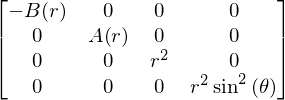

In [165]:
print('A matriz dos coeficientes da métrica é:')
display(g(All, All))  #Mostramos aquí a matriz de coeficientes da métrica



In [166]:
print('Os coeficientes da métrica son:')

display(g(1, 1))
display(g(2, 2))
display(g(3, 3))
display(g(4, 4))



Os coeficientes da métrica son:


## Cálculo de cousas de Relatividade Xeral 

Podemos agora empezar a calcular cousas que a man $suputamadre$ las va a volver a hacer xD

### Conexión afín 

Matriz para a conexión co primeiro coeficiente t


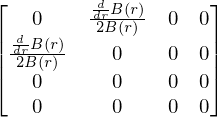

Matriz para a conexión co primeiro coeficiente r


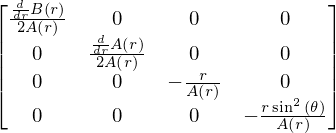

Matriz para a conexión co primeiro coeficiente theta


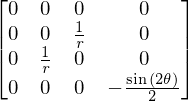

Matriz para a conexión co primeiro coeficiente phi


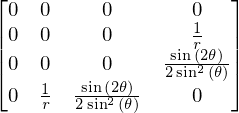

Aquí se mostran os coeficientes non nulos


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [176]:
Ga = Christoffel('Ga', g)   #Calculamos a conexión afín

print('Matriz para a conexión co primeiro coeficiente t')

display(Ga(-1, All, All))  #Mostramos a Matriz de \Gamma^t_{i, j},        con i, j = t, r, theta, phi

print('Matriz para a conexión co primeiro coeficiente r')

display(Ga(-2, All, All))  #Mostramos a Matriz de \Gamma^r_{i, \nu},      con i, j = t, r, theta, phi

print('Matriz para a conexión co primeiro coeficiente theta')

display(Ga(-3, All, All))  #Mostramos a Matriz de \Gamma^theta_{i, \nu},  con i, j = t, r, theta, phi

print('Matriz para a conexión co primeiro coeficiente phi')

display(Ga(-4, All, All))  #Mostramos a Matriz de \Gamma^phi_{i, \nu},    con i, j = t, r, theta, phi


print('Aquí se mostran os coeficientes non nulos')

for i, j, k in list(variations(range(1, 5), 3, True)):    #Mostramos solo as conexións non nulas
    if Ga(-i, j, k) != 0 and j <= k:
        if j <k:
            display(Math('\Gamma^{'+str(x(-i))+'}_{'+str(x(-j)) + str(x(-k))+'} = \Gamma^{'+str(x(-i))+'}_{'+str(x(-k)) + str(x(-j))+'} = '+latex(Ga(-i, j, k))))
        else:
            display(Math('\Gamma^{'+str(x(-i))+'}_{'+str(x(-j)) + str(x(-k))+'} = '+latex(Ga(-i, j, k))))


### Riemann 

In [177]:
Rm = Riemann('Rm', g)

 #Aquí móstranse solo as compoñentes non nulas do tensor con todos os índices covariantes
for i, j, k, l in list(variations(range(1, 5), 4, True)):  
    if Rm(i, j, k, l) != 0 and k<l and i<j:
        display(Math('R_{'+str(x(-i))+str(x(-j))+str(x(-k))+str(x(-l))+'} = '+latex(Rm(i, j, k, l))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Ricci

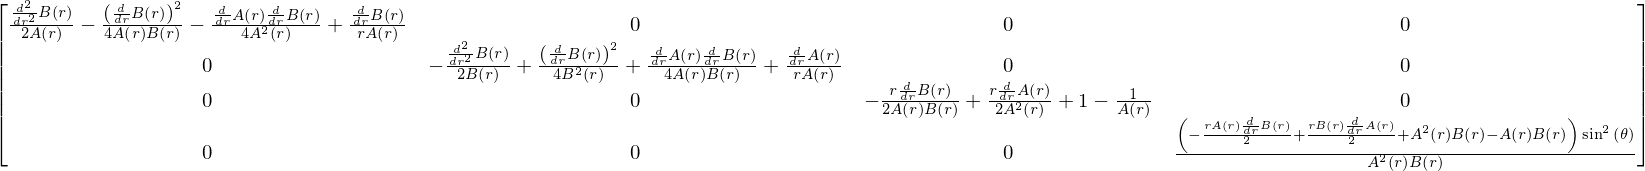

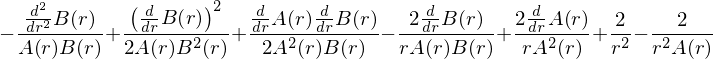

In [178]:
Ri = Ricci('Ri', g)   #Calculamos o tensor de Ricci


display(Ri(All, All))

Ri.scalar()   #Calculamos o escalar de curvatura